# I. Classification

## 1. k-Nearest Neighbors

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

In [74]:
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

(1, 8)

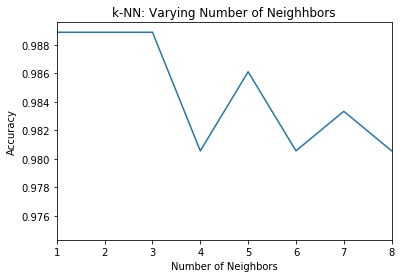

In [27]:
# Apply kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    # Create classifier with K as the neighbour count
    classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit classifier to training data
    classifier.fit(x_train, y_train)
    
    # Test classifier against un-seen test data
    y_pred = classifier.predict(x_test)
    
    # Log results.
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores_list)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("k-NN: Varying Number of Neighhbors")
plt.xlim(1, 8)

These results indicate that a k-value between 1 and 3 is optimum. 
We will choose 1.

## 2. Support Vector Machine

In [48]:
from sklearn import svm

svm_scores = {}

kernels = ["linear", "rbf", "poly"]

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='scale')
    clf.fit(x_train, y_train)
    
    svm_y_pred = clf.predict(x_test)
    print("====> " + kernel + "-kernel results:")
    print(metrics.classification_report(y_test, svm_y_pred))

====> linear-kernel results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.89      1.00      0.94        32
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       1.00      0.97      0.99        37
           5       0.95      1.00      0.97        38
           6       1.00      0.97      0.99        35
           7       1.00      1.00      1.00        38
           8       0.97      0.91      0.94        33
           9       1.00      0.97      0.99        35

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

====> rbf-kernel results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.94      1.00      0.97        32
           2       1.00

We can see that the polynomial and gamma kernels outperformed the linear kernel. Polynomial could be opted for as it has consistently accuracy, though a similar average to the gamma kernel.

## 3. Naive Bayes

Accuracy of using Naive Bayes method for classification: 0.8472222222222222


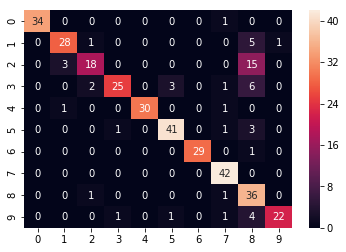

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

accuracy = (y_test.shape[0] - (y_test != y_pred).sum()) / y_test.shape[0]
print("Accuracy of using Naive Bayes method for classification: " + str(accuracy))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
# Comparison of different classifiers in same plot:
# 1. k-NearestNeighbours with 1 neighbour
# 2. SVM with polynomial kernel
# 3. Naive Bayes